In [17]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
import scipy.constants as cnst
import emcee
import corner

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
#mpl.rcParams['axes.spines.right'] = False
#mpl.rcParams['axes.spines.top'] = False

In [18]:
NOMI = np.array(["indice", "csi", "theta", "theta_p", "g_0", "f_0"])
ORDINE = {nome: i for i,nome in enumerate(NOMI)}

In [19]:
table_Eulero = Table.read('build/Lane-Emden_Eulero_n=0.dat', names = NOMI,  format="ascii")
table_RK = Table.read('build/Lane-Emden_RK_n=0.dat', names = NOMI,  format="ascii")
table_Eulero, table_RK

(<Table length=5000>
 indice   csi    theta     theta_p     g_0      f_0     
 int64  float64 float64    float64    int64   float64   
 ------ ------- -------- ------------ ----- ------------
      0  0.0001      1.0          0.0     1          0.0
      1  0.0011      1.0       -0.001     1    -1.21e-09
      2  0.0021 0.999999 -0.000181818     1 -8.01818e-10
      3  0.0031 0.999999  -0.00100866     1  -9.6932e-09
      4  0.0041 0.999998  -0.00135791     1 -2.28265e-08
      5  0.0051 0.999996  -0.00169552     1 -4.41004e-08
      6  0.0061 0.999995  -0.00203061     1 -7.55589e-08
      7  0.0071 0.999993  -0.00236483     1 -1.19211e-07
      8  0.0081  0.99999  -0.00269868     1 -1.77061e-07
      9  0.0091 0.999988  -0.00303234     1 -2.51108e-07
    ...     ...      ...          ...   ...          ...
   4990  4.9901 -3.14935     -1.66337     1     -41.4197
   4991  4.9911 -3.15101      -1.6637     1     -41.4446
   4992  4.9921 -3.15268     -1.66403     1     -41.4695
   4993  4

In [20]:
data_Eulero = np.array( [ table_Eulero[nome] for nome in NOMI  ] ).T
indici_Eulero = data_Eulero[:, ORDINE["indice"] ]
csis_Eulero = data_Eulero[:, ORDINE["csi"] ]
thetas_Eulero = data_Eulero[:, ORDINE["theta"] ]

data_RK = np.array( [ table_RK[nome] for nome in NOMI  ] ).T
indici_RK = data_RK[:, ORDINE["indice"] ]
csis_RK = data_RK[:, ORDINE["csi"] ]
thetas_RK = data_RK[:, ORDINE["theta"] ]

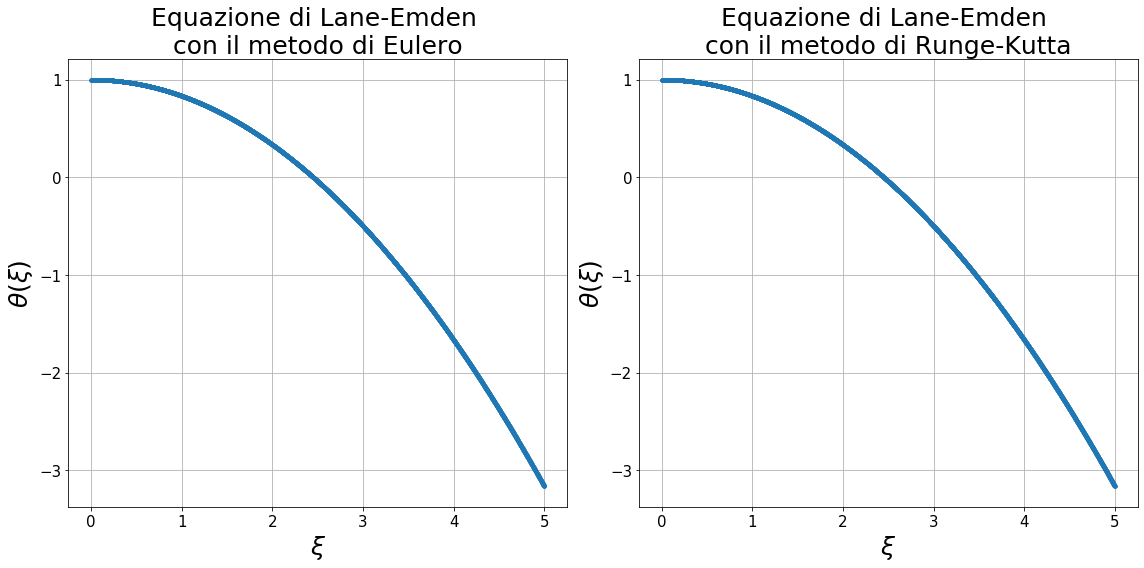

In [21]:
SIZE_ticks = 15
SIZE_labels = 25

fig, axs = plt.subplots(1, 2, figsize=(16, 8), tight_layout=True)
axs = axs.reshape(-1)

ax = axs[0]
ax.plot(csis_Eulero, thetas_Eulero, '.')
ax.grid()
ax.tick_params(axis="x", labelsize=SIZE_ticks)
ax.tick_params(axis="y", labelsize=SIZE_ticks)
ax.set_title("Equazione di Lane-Emden \ncon il metodo di Eulero", size=SIZE_labels)
ax.set_xlabel(r'$\xi$', size=SIZE_labels)
ax.set_ylabel(r'$\theta(\xi)$', size=SIZE_labels);

ax = axs[1]
ax.plot(csis_RK, thetas_RK, '.')
ax.grid()
ax.tick_params(axis="x", labelsize=SIZE_ticks)
ax.tick_params(axis="y", labelsize=SIZE_ticks)
ax.set_title("Equazione di Lane-Emden \ncon il metodo di Runge-Kutta", size=SIZE_labels)
ax.set_xlabel(r'$\xi$', size=SIZE_labels)
ax.set_ylabel(r'$\theta(\xi)$', size=SIZE_labels);

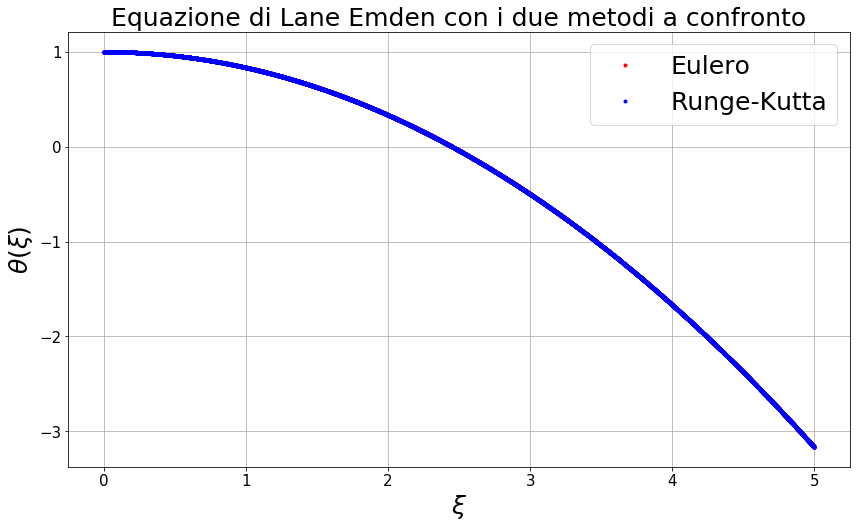

In [22]:
SIZE_ticks = 15
SIZE_labels = 25

fig = plt.figure(figsize=(14,8))

plt.plot(csis_Eulero, thetas_Eulero, '.', color = "red", label = "Eulero")
plt.plot(csis_RK, thetas_RK, '.', color = "blue", label = "Runge-Kutta")
plt.grid()

plt.xticks(size=SIZE_ticks)
plt.yticks(size=SIZE_ticks)
plt.title("Equazione di Lane Emden con i due metodi a confronto", size=SIZE_labels)
plt.xlabel(r'$\xi$', size=SIZE_labels)
plt.ylabel(r'$\theta(\xi)$', size=SIZE_labels)
plt.legend(prop={"size":25});

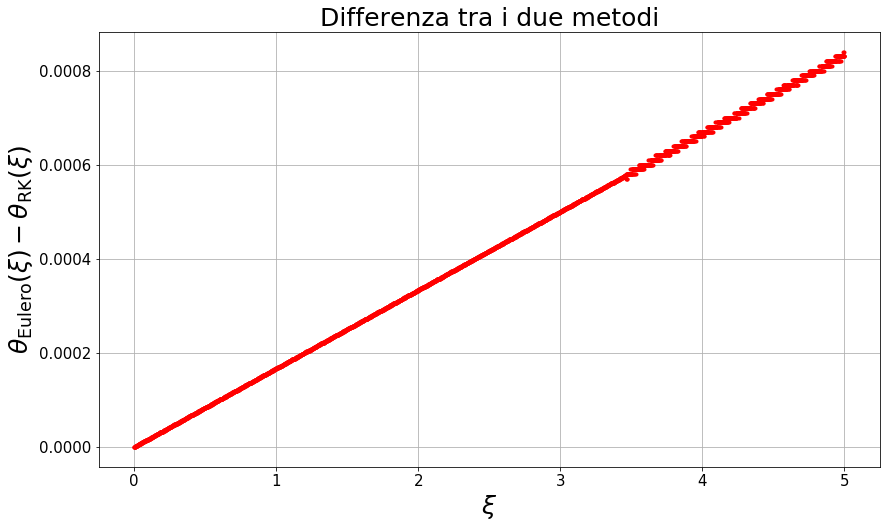

In [23]:
SIZE_ticks = 15
SIZE_labels = 25

fig = plt.figure(figsize=(14,8))

plt.plot(csis_Eulero, thetas_Eulero - thetas_RK, '.', color = "red", label = "Eulero")
plt.grid()

plt.xticks(size=SIZE_ticks)
plt.yticks(size=SIZE_ticks)
plt.title("Differenza tra i due metodi", size=SIZE_labels)
plt.xlabel(r'$\xi$', size=SIZE_labels)
plt.ylabel(r'$\theta_{\mathrm{Eulero}}(\xi) - \theta_{\mathrm{RK}}(\xi) $', size=SIZE_labels);